# 用户价值分层探索（RFM+K-Means）

## 项目背景与目的

### 项目背景
企业发展到一定的规模之后，需要对用户的特性进行精准营销，提高营销效率。
RFM模型是基于用户行为数据的分析方法，用于评估客户的价值和转化难易程度。将用户在最近一次购买时间 、消费频次、消费金额积累三个维度进行用户分群，通过分析用户的三个指标，根据不同群体的情况作不同的运营策略。
1. **R (Recency)** - 最近一次消费时间：衡量用户最后一次购买或消费的时间距离现在有多久。R值越小，表示用户最近有消费行为，其价值通常被认为越高，因为它们更有可能进行再次购买。
2. **F (Frequency)** - 消费频次：衡量用户在特定时间段内购买或消费的频率。F值越高，表示用户的消费频次越频繁，这通常意味着用户对产品的忠诚度更高，对企业的价值也更大。
3. **M (Monetary)** - 消费金额：衡量用户在特定时间段内的总消费金额。M值越高，表示用户的累计消费金额越大，这通常反映了用户的购买力和对产品的贡献度。

通过对这三个指标的分析，可以将用户分为不同的群体，并针对不同群体制定相应的运营策略。例如：
- 对于R值较小、F和M值较高的用户群体，可能会提供忠诚度奖励或VIP服务，以维持其高价值客户。
- 对于R值较大、但是F和M值较高的用户群体，可能会采取促销活动或个性化推荐，以重新吸引他们的注意力。
- 对于R值较小、F值较高但M值较低的用户群体，可能会提供小额优惠或捆绑销售，以提高他们的消费金额。

### 项目目的
1. 关于用户如何在这三个维度上分群，有很多不同的方法，探讨以下三种方式在分群上的优劣性，并且尝试进行说明在什么情况下使用什么方法较好：
    - 用中位数分群
	- 用分组价值打分及平均值进行用户分群
	- 用聚类方法进行分群
2. 进行用户分群，对不同的分群作出解释及运营建议

## 数据读取及预处理

In [1]:
# %matplotlib ipympl
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 

warnings.filterwarnings('ignore')

/Users/tangwei/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/tangwei/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
data = pd.read_excel('/Users/tangwei/Downloads/📈Work/Data-analysis-doing/电商数据客户价值分析探索/data.xlsx')
data.rename(columns={'买家实际支付金额': 'M'}, inplace=True)

In [3]:
data.head()

,买家会员名,R,M,F
0,00牛哥哥00,692.591435,402.00,2
1,020luo,407.855521,74.70,1
2,0587xueguangju,625.368148,268.00,1
3,0o秋天de童话,82.045532,411.50,2
4,0残缺0,345.463183,48.86,1


In [4]:
data.isna().sum(axis=0)

买家会员名    0
R        0
M        0
F        0
dtype: int64

In [5]:
# 确认一下买家会员号名是否唯一
len(data["买家会员名"].unique()) == len(data)

True

## 描述性统计

In [6]:
sns.set_style(style='whitegrid')

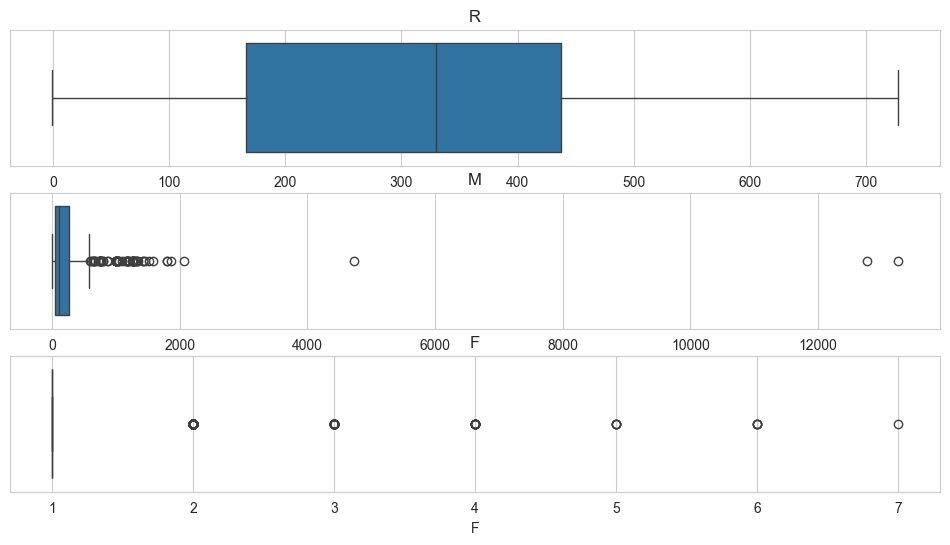

In [7]:
colnames = ['R','M','F']
f = plt.figure(figsize=(12,6))
for i in range(3):
    plt.subplot(3,1,i+1)
    sns.boxplot(x= data.loc[:,colnames[i]])
    plt.title(colnames[i])  


如上面三幅图所示，只有R的值分布相对均匀，F M的值都是右偏偏态分布；


## 用户价值分类

### 1. 用中位数进行用户价值分类

In [8]:
# 计算R F M的中位数
median_list = data[['R','M','F']].median(axis=0)

# 将每个客户进行标记
data.loc[:,'R值判断高低'] = data.loc[:,'R'].apply(lambda x:'0' if x >= median_list[0] else '1')
data.loc[:,'M值判断高低'] = data.loc[:,'M'].apply(lambda x:'0' if x <= median_list[1] else '1')
data.loc[:,'F值判断高低'] = data.loc[:,'F'].apply(lambda x:'0' if x <= median_list[2] else '1')


dict_type = {
    '000':'一般挽留用户',
    '100':'一般发展用户',
    '001':'一般保持用户',
    '101':'一般价值用户',
    '010':'重要挽留用户',
    '011':'重要保持用户',
    '110':'重要发展用户',
    '111':'重要价值用户'
}
data.loc[:,'tag'] = data.loc[:,'R值判断高低'] + data.loc[:,'M值判断高低'] + data.loc[:,'F值判断高低']
data.loc[:,'用户价值分类'] = data.loc[:,'tag'].map(dict_type)

In [9]:
data.head()

,买家会员名,R,M,F,R值判断高低,M值判断高低,F值判断高低,tag,用户价值分类
0,00牛哥哥00,692.591435,402.00,2,0,1,1,011,重要保持用户
1,020luo,407.855521,74.70,1,0,0,0,000,一般挽留用户
2,0587xueguangju,625.368148,268.00,1,0,1,0,010,重要挽留用户
3,0o秋天de童话,82.045532,411.50,2,1,1,1,111,重要价值用户
4,0残缺0,345.463183,48.86,1,0,0,0,000,一般挽留用户


In [10]:
plt.rcParams['font.family'] = 'Heiti TC' 

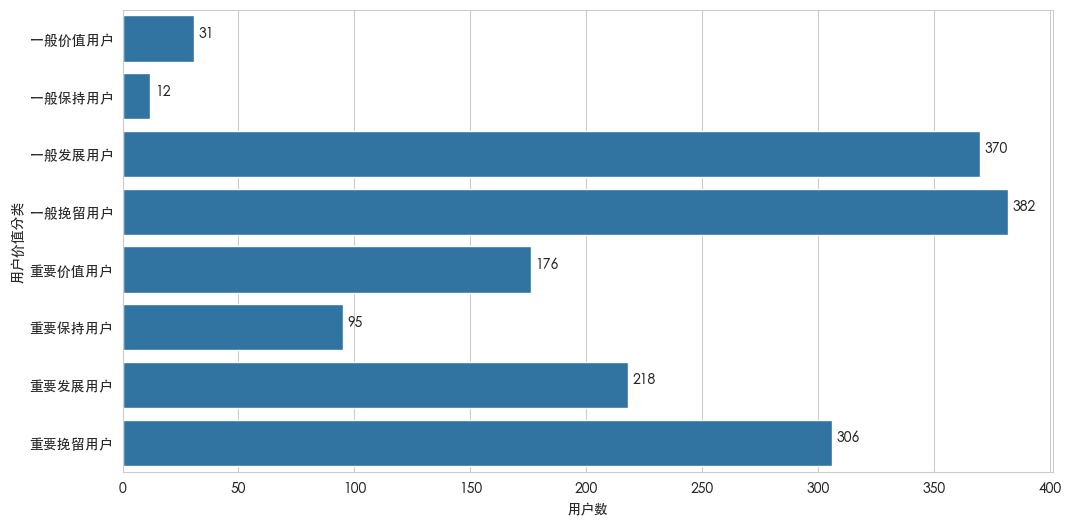

In [11]:
result_median = data.groupby('用户价值分类')['tag'].count()
plt.figure(figsize=(12,6))

sns.barplot(y=result_median.index,x=result_median)
for i in range(len(result_median)):
    value = result_median[i]
    plt.text(y=i,x=value+2,s='%s'%(value),fontsize=10)
plt.xlabel('用户数')
plt.show()

从上图来说，重要用户中，
重要挽留用户较多，有306位，他们是购买金额较高但是购买频次不高，最近也没有下单的用户，建议:
> 1. 个性化推荐和优惠：根据用户的历史购买记录和浏览习惯，推送个性化的产品推荐。提供专属优惠券或折扣，以激励他们重新下单。例如，限时折扣、买一送一或满减优惠。
> 2. 会员或忠诚度计划：吸引他们加入或升级现有的会员计划，提供积分返利或专属福利，让他们感受到作为高价值客户的特别待遇。
> 3. 唤醒邮件或短信：发送唤醒邮件或短信，提醒他们有新的优惠或产品。可以结合限时优惠，制造紧迫感。在邮件或短信中突出他们之前的购买行为，提醒他们他们是重要客户。
> 4. 增加互动：通过问卷调查或反馈表了解他们为什么最近没有购买，获取他们的意见和建议。举办有趣的线上活动，如抽奖、游戏或问答，增加品牌互动和用户粘性。

重要保持用户：即支付金额较高，购买频次较高的用户 但是最近没有下单的用户，建议:
> 1. 会员或忠诚度计划：吸引他们加入或升级现有的会员计划，提供积分返利或专属福利，让他们感受到作为高价值客户的特别待遇。
> 2. 唤醒邮件或短信：发送唤醒邮件或短信，提醒他们有新的优惠或产品。可以结合限时优惠，制造紧迫感。在邮件或短信中突出他们之前的购买行为，提醒他们他们是重要客户。
> 3. 增加互动：通过问卷调查或反馈表了解他们为什么最近没有购买，获取他们的意见和建议。举办有趣的线上活动，如抽奖、游戏或问答，增加品牌互动和用户粘性。
> 4. 限量或独家产品：推出限量版或独家产品，吸引他们重新关注品牌。高价值客户通常对特别和独家的产品更感兴趣。

重要发展用户：即支付金额较高、最近有下单但是购买频次不高的用户，需要提高消费频次，建议：
> 1. 促销活动：推出促销活动，如满减、买赠、限时折扣等，激励用户增加购买频次。可以结合用户的历史购买记录，针对性地推送相关产品或优惠。
> 2. 个性化推荐：根据用户的购买历史和浏览行为，推送个性化的产品推荐。提供专属优惠券或折扣，吸引他们再次下单。
> 3. 会员或忠诚度计划：吸引他们加入或升级会员计划，提供积分返利或专属福利。例如，购买满一定金额即可获得积分或礼品，激励用户增加购买频次。
> 4. 限时促销：推出限时促销活动，制造紧迫感。例如，限时折扣、买一送一或满减优惠，吸引用户尽快下单。
> 5. 互动活动：举办有趣的线上活动，如抽奖、游戏或问答，增加用户互动和粘性。可以结合促销活动，提高用户参与度。
> 6. 社交分享：鼓励用户分享购买体验或产品评价，提高品牌曝光度和用户参与度。可以提供积分或礼品作为奖励，激励用户分享。
> 7. 个性化服务：提供个性化的售后服务，如定制产品、专属客服或快速退换货服务。提高用户满意度和忠诚度，增加复购率。
> 8. 会员专属活动：举办会员专属活动，如新品预售、专属礼包或线下活动。提高用户参与度和忠诚度，增加用户粘性。
> 9. 产品体验：提供产品试用或体验活动，让用户更直观地了解产品特点和优势。可以提供免费样品或试用装，激励用户尝试购买。


#### 中位数分群的思考
**中位数划分存在的问题：** 在用户价值分类当中，用中位数划分用户群体，可能会存在划分的群体在价值方面没有明显的区分，比如说买家实际支付金额（M）的中位数为104.65，但是在104.65附近还有很多数值，比104.65高的和比104.65低的用户可能相差不远，这样得到的价值高和价值低的部分用户其实区别不大；

---
在实际操作中，可以用以下的方法区分：
- **方法一：** 将贡献80%营业额的用户划分为M价值比较高的用户，将贡献80%单量的用户划分为F价值较高的用户；
- **方法二：** 使用一些行业的数据，在R的价值划分上，比如说，
	+ 一个用户大概多久可以熟悉产品的使用
	+ 购买的品类是消耗品（需要经常购买）还是使用时间较长的品类，平均**多久会产生复购**
	对于这些信息，可以作为R划分的节点
- **方法三：** 使用聚类对RFM进行划分，在进行打分，这样可以利用用户群的数据离散及集中程度，从某种程度上减少对于价值高的用户与价值低的用户在数值上相差不远的问题

### 2.用分组价值打分及平均值进行用户分群

In [12]:
# 重新保存一个数据集，以免产生混乱
data_mean = data.copy()
data_mean = data.loc[:,['买家会员名','R','M','F']]

In [13]:
# 数据分箱
# 采取均匀的数据分箱方法
R_score =  pd.cut(data_mean.loc[:,'R'],bins=5,labels=[5,4,3,2,1],retbins=True)
F_score =  pd.cut(data_mean.loc[:,'F'],bins=5,labels=[1,2,3,4,5],retbins=True)
M_score = pd.cut(data_mean.loc[:,'M'],bins=5,labels=[1,2,3,4,5],retbins=True)
data_mean.loc[:,'R-score'] = R_score[0]
data_mean.loc[:,'F-score'] = F_score[0]
data_mean.loc[:,'M-score'] = M_score[0]
print('R的分组临界值：',R_score[-1])
print('F的分组临界值：',F_score[-1])
print('M的分组临界值：',M_score[-1])
data_mean.head()

R的分组临界值： [ -1.15022194 145.06605556 290.55488889 436.04372222 581.53255556
 727.02138889]
F的分组临界值： [0.994 2.2   3.4   4.6   5.8   7.   ]
M的分组临界值： [-8.241800e+00  2.653360e+03  5.301720e+03  7.950080e+03  1.059844e+04
  1.324680e+04]


,买家会员名,R,M,F,R-score,F-score,M-score
0,00牛哥哥00,692.591435,402.00,2,1,1,1
1,020luo,407.855521,74.70,1,3,1,1
2,0587xueguangju,625.368148,268.00,1,1,1,1
3,0o秋天de童话,82.045532,411.50,2,5,1,1
4,0残缺0,345.463183,48.86,1,3,1,1


In [14]:
# 计算平均值
mean_list = data_mean[['R-score','M-score','F-score']].astype(int).mean()
print(mean_list)

R-score    3.293711
M-score    1.005660
F-score    1.076730
dtype: float64


In [15]:
# 分别划分R\F\M
data_mean.loc[:,'R值判断高低'] = data_mean.loc[:,'R-score'].apply(lambda x: '0' if x<=mean_list[0] else '1')
data_mean.loc[:,'M值判断高低'] = data_mean.loc[:,'M-score'].apply(lambda x: '0' if x<=mean_list[1] else '1')
data_mean.loc[:,'F值判断高低'] = data_mean.loc[:,'F-score'].apply(lambda x: '0' if x<=mean_list[2] else '1')
# 标记RFM
data_mean.loc[:,'tag'] = data_mean.loc[:,'R值判断高低'] + data_mean.loc[:,'M值判断高低'] + data_mean.loc[:,'F值判断高低']
data_mean.loc[:,'用户价值分类'] = data_mean.loc[:,'tag'].map(dict_type)


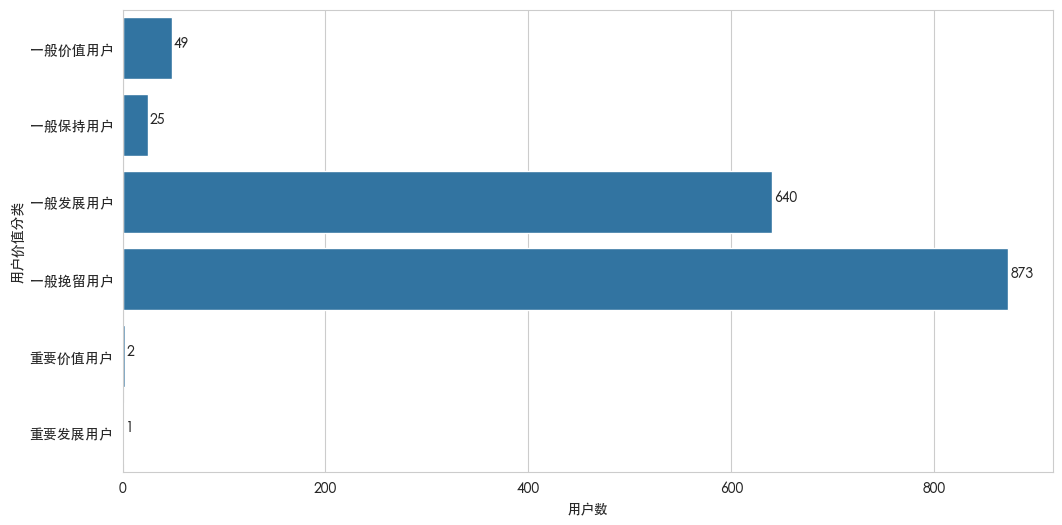

In [16]:
# 分组结果展示
result_mean = data_mean.groupby('用户价值分类')['tag'].count()
plt.figure(figsize=(12,6))
sns.barplot(y=result_mean.index,x=result_mean)
for i in range(len(result_mean)):
    value = result_mean[i]
    plt.text(y=i,x=value+2,s='%s'%(value),fontsize=10)
plt.xlabel('用户数')
plt.show()

#### 平均值分组打分方法的思考
在这个方法中，使用均匀分箱的方式进行打分，最终进行划分的结果，不会在F、M数值相差不远的用户划分为两类，在划分群组上更加合理

优化方向：使用行业数据结合业务经验调整分组方法。本质上类似于阈值分析，区分什么是好的，什么是不好的。

### 3. 用聚类方法进行用户分群

In [17]:
from sklearn.cluster import KMeans
from sklearn import preprocessing

#### 1) 标准化处理

In [18]:
X = data.loc[:,['R','M','F']]
for col in X.columns:
    X.loc[:,col] = preprocessing.StandardScaler().fit_transform(X.loc[:,[col]]) # 标准化后输出numpy.ndarray，所以循环处理

In [64]:
X.describe()

,R,M,F,category
count,1.590000e+03,1.590000e+03,1.590000e+03,1590.000000
mean,-9.384527e-17,-2.876804e-17,-7.485277e-17,1.070440
std,1.000315e+00,1.000315e+00,1.000315e+00,0.641599
min,-1.632072e+00,-4.014056e-01,-4.139585e-01,0.000000
25%,-7.588200e-01,-3.112307e-01,-4.139585e-01,1.000000
50%,9.790299e-02,-2.136218e-01,-4.139585e-01,1.000000
75%,6.630941e-01,9.420029e-02,-4.139585e-01,1.000000
max,2.181441e+00,2.455188e+01,8.623030e+00,3.000000


#### 2) 测试获取最优的聚类簇数

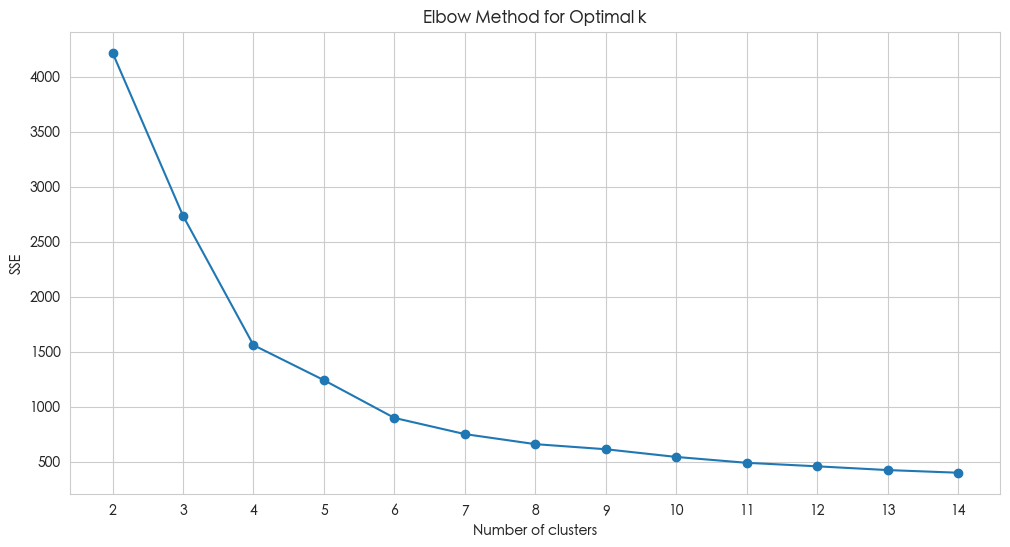

In [62]:
sse = []
scope = range(2,15)
for k in scope:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.xticks(scope)
plt.plot(scope, sse, marker="o")
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method for Optimal k')
plt.show()

根据肘部法则，在k=4时产生明显的转折，应该取k=4

#### 3) 确定模型

In [66]:
# random.seed(123)
kmeans = KMeans(n_clusters=4,max_iter=1000,random_state=123)
kmeans.fit(X)
X['category'] = kmeans.labels_
label_mean = X.loc[:,['category','R','M','F']].groupby('category').mean()
X['category'].value_counts()

category
1    930
2    385
0    273
3      2
Name: count, dtype: int64

In [68]:
label_mean

,R,M,F
category,,,
0,-0.477680,0.230680,1.743223
1,0.634791,-0.054210,-0.349177
2,-1.188546,-0.157779,-0.413958
3,-1.179410,24.092454,4.104536


为了给每一类赋予实际意义，画出他们在RFM各个值的箱线图

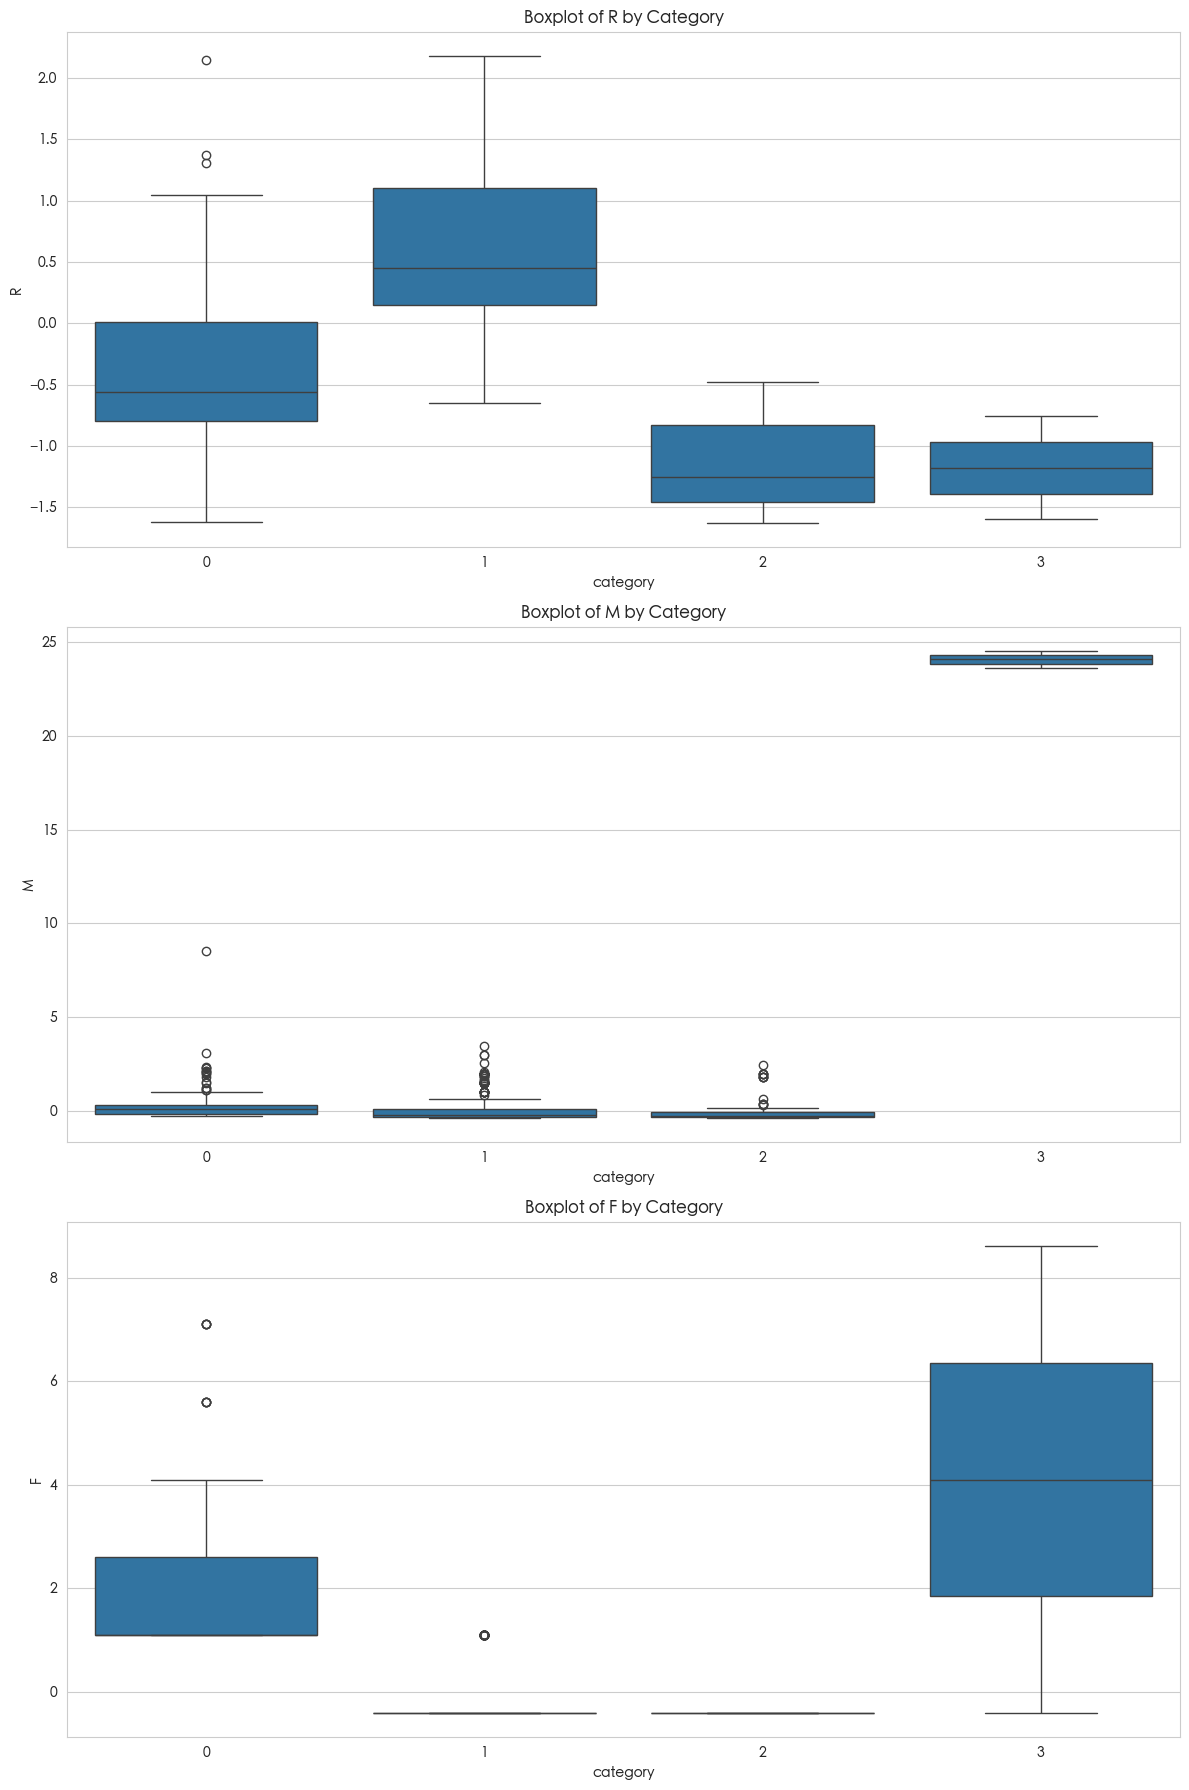

In [69]:
# 创建一个包含三个子图的图像
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

sns.boxplot(ax=axes[0], x='category', y='R', data=X)
axes[0].set_title('Boxplot of R by Category')

sns.boxplot(ax=axes[1], x='category', y='M', data=X)
axes[1].set_title('Boxplot of M by Category')

sns.boxplot(ax=axes[2], x='category', y='F', data=X)
axes[2].set_title('Boxplot of F by Category')

plt.tight_layout()
plt.show()

- 从R的各类分布图可以看出，1类用户的最近一次购买时间距今最远。
- 从买家实际支付金额来说，3类用户具有较高的支付金额；
- 从购买频次来说，标签为0、3的用户具有最高的购买频次，1、2都是低购买频次

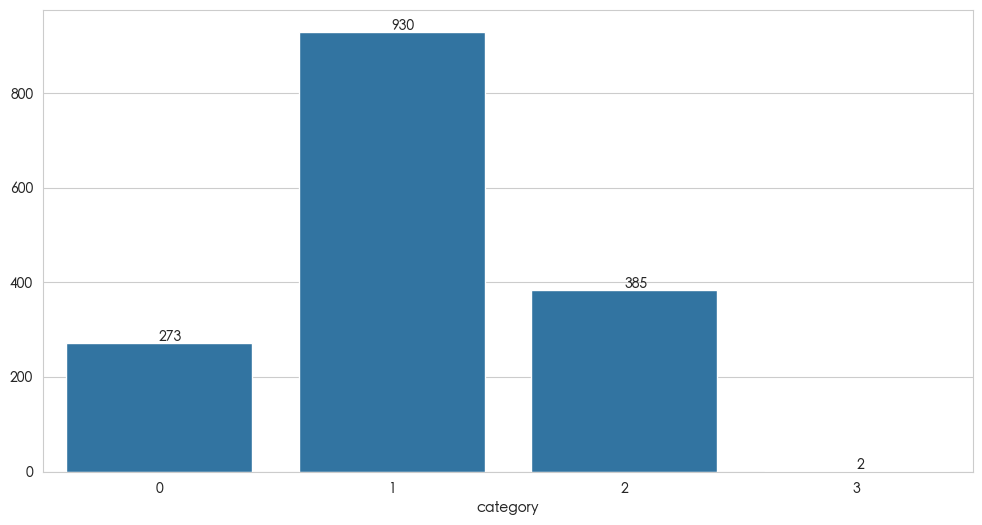

In [70]:
label_count = X.groupby('category')['R'].count()
plt.figure(figsize=(12,6))
sns.barplot(x=label_count.index,y=label_count.values)
for i in range(len(label_count)):
    plt.text(x=label_count.index[i],y=label_count.values[i]+2,s='%s'%(label_count.values[i]))
plt.show()

#### 4) 聚类结论

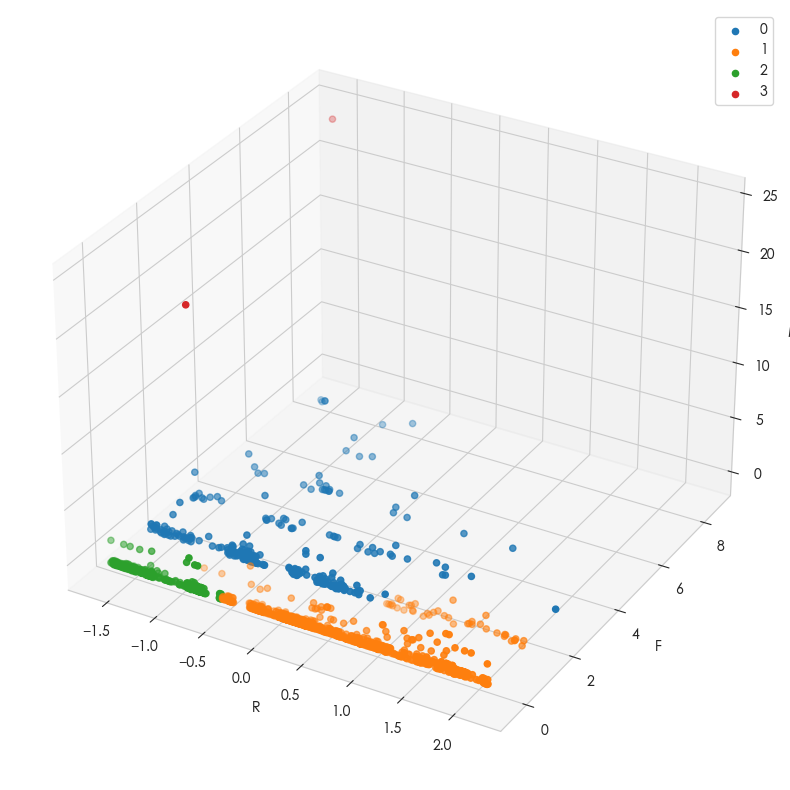

In [71]:
# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot the data points with different colors based on the cluster labels
# 标记不同的类别
for i in range(4):
    ax.scatter(X.loc[X['category'] == i, 'R'], X.loc[X['category'] == i, 'F'], X.loc[X['category'] == i, 'M'], label=i)
# ax.scatter(X['R'], X['F'], X['M'], c=labels, cmap='viridis')
ax.legend()
# Set labels for the axes
ax.set_xlabel('R')
ax.set_ylabel('F')
ax.set_zlabel('M')

# Show the plot
plt.show()

1. 努力将0类用户发展成重要高价值用户，通过低价会员升级、高价产品折扣等方式提高购买金额。
2. 2类用户大概率是新用户，最近需要促进1类用户的购买，提高他们的购买频次。
3. 对于1类用户，属于一般挽留用户，大概率流失了，需要去分析具体原因，加以改善。有空可以尝试对1类用户进行进一步的细分，拉回有需求有价值的用户。

![image](./imgs/img1.png)

上图为以前的的分类结果运营指导，分类序号有所不同。

### 4. 结论与思考
#### 用户价值分类结论：
在这个案例中，聚类可以将用户进行大致分群，进行精细化营销，聚类和分组价值打分方法的分群结论上比较相似：
- 即在这个数据集中，存在少量的重要价值用户；
- 一般挽留用户居多，很多用户在没有形成购物习惯的时候就已经开始有流失的倾向，需要具体分析原因，有效的挽留这些用户。
- 一般价值用户占比也较多，通过低价会员升级、高价产品折扣等方式提高购买金额，将其发展成重要高价值用户。
-  其次为一般发展用户，这些用户有可能刚刚开始使用，有可能是新用户，可以发放优惠券等方式促进复购，提高购买频次，发展用户忠诚度。

#### 分群方法选择的思考：
在方法的选择上，如果开始无法确定节点对数据进行分组打分，那么在一开始选择聚类的方式是比较合理的，可以随着对业务数据的了解，积累业务经验数据之后再进行分组打分，用平均值方式进行分群会更好。